In [2]:
"Hare krishna"

'Hare krishna'

## Importing Pulmonary Edema images

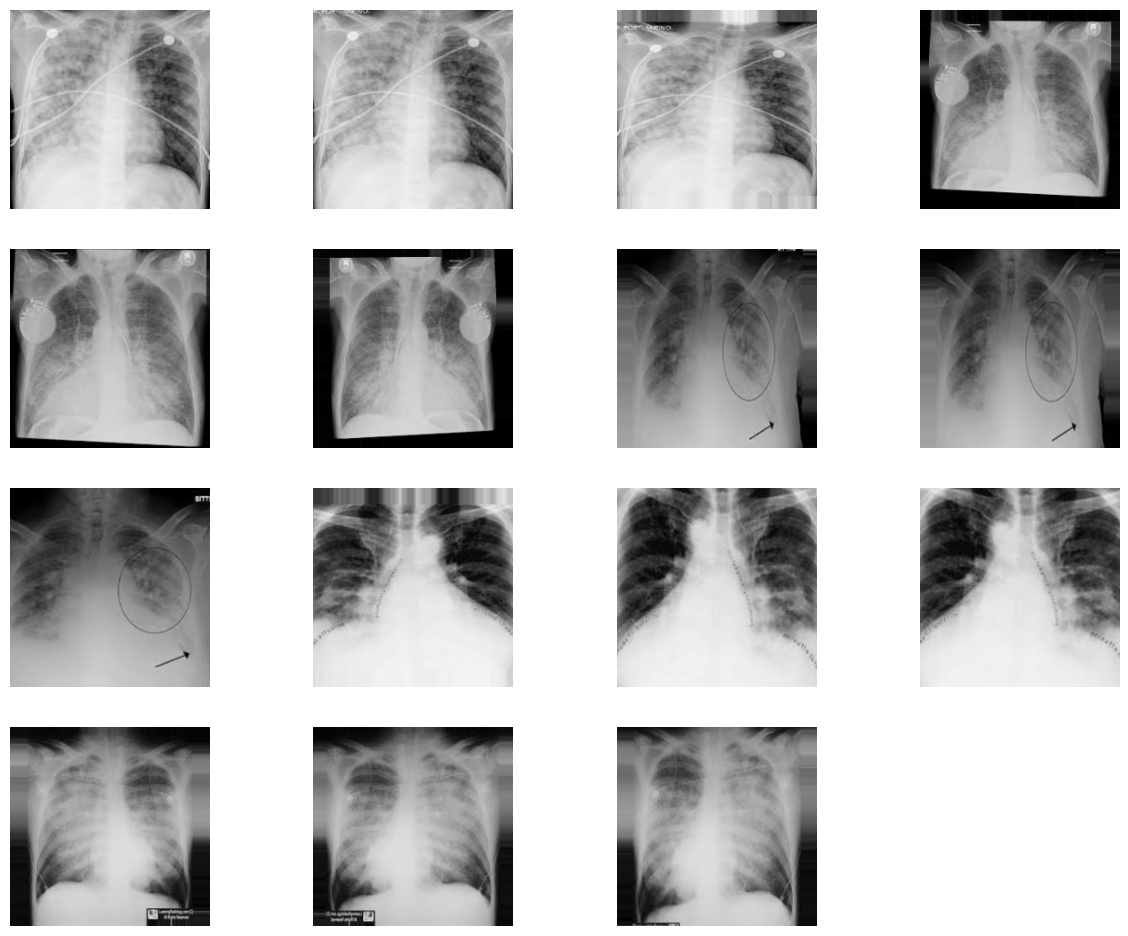

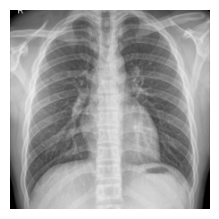

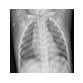

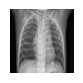

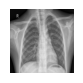

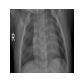

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/Users/jaydaksharora/Desktop/pulmonary'
img_height, img_width = 224, 224
batch_size = 32
image_files = [os.path.join(train_data_dir, file) for file in os.listdir(train_data_dir) if file.endswith('.jpeg')]
images = []
for img_path in image_files:
    img = Image.open(img_path)
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0  
    images.append(img_array)
X = np.array(images)
y = np.ones(len(X), dtype=int)
train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
augmented_images = []
augmented_labels = []
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(train_dataset.take(5)):
    for j in range(3):  
        augmented_image = datagen.random_transform(image.numpy())
        augmented_images.append(augmented_image)
        augmented_labels.append(1) 
        subplot_number = i * 3 + j + 1
        ax = plt.subplot(5, 4, subplot_number)  
        plt.imshow(augmented_image)
        plt.axis('off')

plt.show()
X_augmented = np.array(augmented_images)
y_augmented = np.array(augmented_labels)
X_combined = np.append(X, X_augmented, axis=0)
y_combined = np.append(y, y_augmented)
combined_dataset = tf.data.Dataset.from_tensor_slices((X_combined, y_combined))


normal_data_dir_2 = '/Users/jaydaksharora/Desktop/y'
normal_image_files_2 = [os.path.join(normal_data_dir_2, file) for file in os.listdir(normal_data_dir_2) if file.endswith('.jpg')]
normal_images_2 = []
for img_path in normal_image_files_2:
    img = Image.open(img_path)
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0  
    normal_images_2.append(img_array)

X_normal_2 = np.array(normal_images_2)
y_normal_2 = np.zeros(len(X_normal_2), dtype=int)
normal_dataset_2 = tf.data.Dataset.from_tensor_slices((X_normal_2, y_normal_2))
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(normal_dataset_2.take(5)):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
X_combined = np.append(X, X_augmented, axis=0)
y_combined = np.append(y, y_augmented)
X_normal_2_combined = np.append(X_combined, X_normal_2, axis=0)
y_normal_2_combined = np.append(y_combined, y_normal_2)
# Combine both normal datasets
combined_normal_dataset = combined_dataset.concatenate(normal_dataset_2)

## Importing Nomal lung diseases

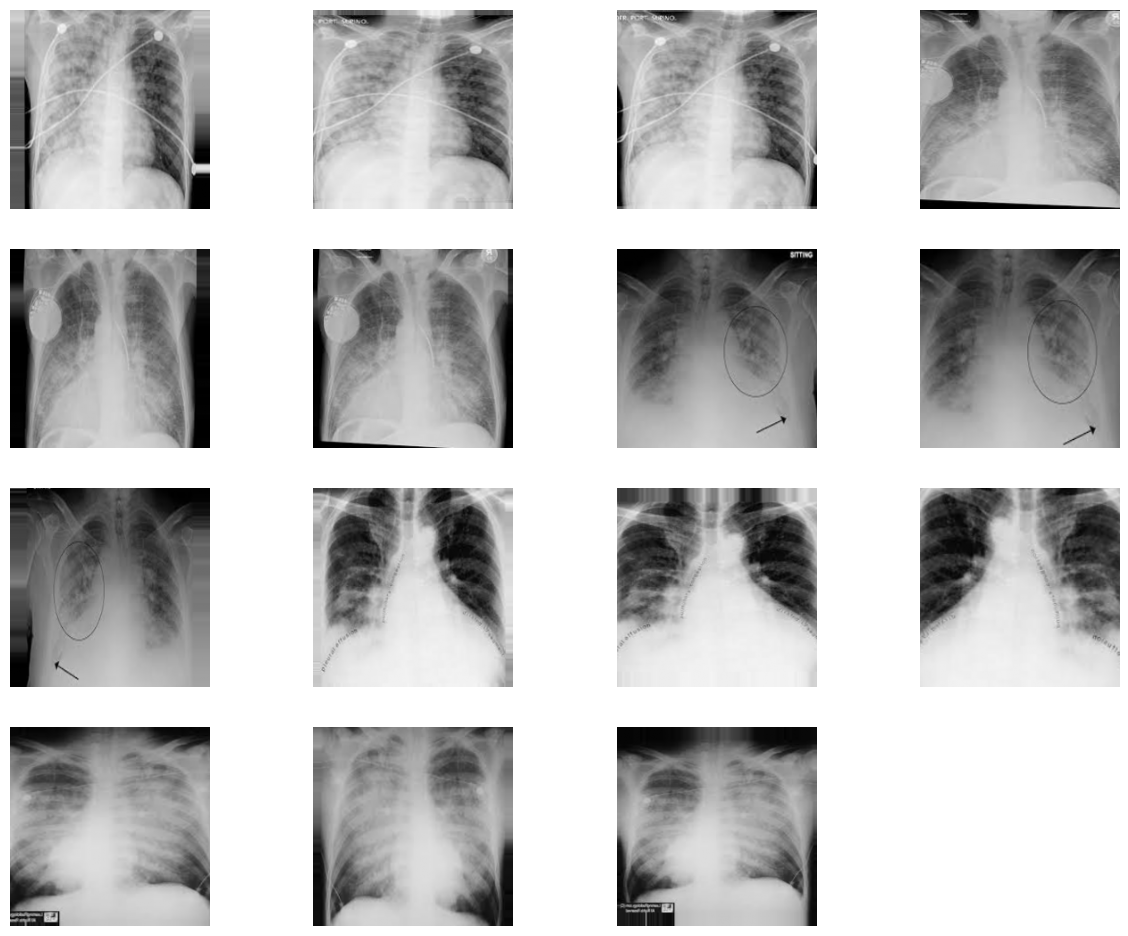

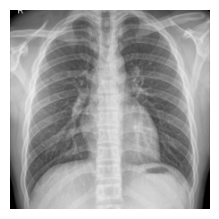

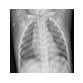

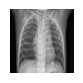

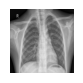

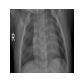

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Function to load and preprocess images from a directory
def load_and_preprocess_images(directory, label):
    image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(('.jpeg', '.jpg'))]
    images = []
    labels = []
    for img_path in image_files:
        img = Image.open(img_path)
        img = img.resize((img_height, img_width))
        img_array = np.array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)
train_data_dir = '/Users/jaydaksharora/Desktop/pulmonary'
X, y = load_and_preprocess_images(train_data_dir, label=1)
original_dataset = tf.data.Dataset.from_tensor_slices((X, y))
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
augmented_images = []
augmented_labels = []
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(original_dataset.take(5)):
    for j in range(3):  
        augmented_image = datagen.random_transform(image.numpy())
        augmented_images.append(augmented_image)
        augmented_labels.append(1) 
        subplot_number = i * 3 + j + 1
        ax = plt.subplot(5, 4, subplot_number)
        plt.imshow(augmented_image)
        plt.axis('off')

plt.show()
X_augmented = np.array(augmented_images)
y_augmented = np.array(augmented_labels)
augmented_dataset = tf.data.Dataset.from_tensor_slices((X_augmented, y_augmented))
normal_data_dir_2 = '/Users/jaydaksharora/Desktop/y'
X_normal_2, y_normal_2 = load_and_preprocess_images(normal_data_dir_2, label=0)
normal_dataset_2 = tf.data.Dataset.from_tensor_slices((X_normal_2, y_normal_2))
plt.figure(figsize=(15, 15))
for i, (image, label) in enumerate(normal_dataset_2.take(5)):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
combined_dataset = original_dataset.concatenate(augmented_dataset)
combined_normal_dataset = combined_dataset.concatenate(normal_dataset_2)
combined_normal_dataset = combined_normal_dataset.shuffle(buffer_size=len(combined_normal_dataset))


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layer with 32 filters, each of size 3x3, and ReLU activation
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
# MaxPooling layer to downsample the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Another Convolutional layer with 64 filters, each of size 3x3, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 3D output to 1D
model.add(Flatten())

# Fully connected (Dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Dropout layer for regularization
model.add(Dropout(0.5))

# Output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
batch_size = 100  
model.fit(X_normal_2_combined, y_normal_2_combined,epochs=100)


Epoch 1/100
3/3 [==============================] - 2s 379ms/step - loss: 7.6606 - accuracy: 0.5542
Epoch 2/100
3/3 [==============================] - 2s 639ms/step - loss: 6.6985 - accuracy: 0.3976
Epoch 3/100
3/3 [==============================] - 2s 664ms/step - loss: 1.0113 - accuracy: 0.5301
Epoch 4/100
3/3 [==============================] - 2s 640ms/step - loss: 0.6494 - accuracy: 0.6506
Epoch 5/100
3/3 [==============================] - 2s 654ms/step - loss: 0.5912 - accuracy: 0.6747
Epoch 6/100
3/3 [==============================] - 2s 693ms/step - loss: 0.5347 - accuracy: 0.7590
Epoch 7/100
3/3 [==============================] - 2s 641ms/step - loss: 0.4040 - accuracy: 0.8675
Epoch 8/100
3/3 [==============================] - 2s 819ms/step - loss: 0.3013 - accuracy: 0.9157
Epoch 9/100
3/3 [==============================] - 2s 711ms/step - loss: 0.1955 - accuracy: 0.9157
Epoch 10/100
3/3 [==============================] - 2s 779ms/step - loss: 0.0990 - accuracy: 0.9880
Epoch 11/

In [7]:
y_normal_2_combined.shape

(83,)

In [8]:
def pred(img):
    images = []
    timg = img.resize((224, 224))
    img_array = np.array(timg) / 255.0  # Use the resized image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    images.append(img_array)
    y = model.predict(images)
    threshold = 0.5

    if y[0, 0] > threshold:
        print('Person has Pulmonary Edema')
    else:
        print('Person does not have Pulmonary Edema')


In [9]:
pred(img)

1/1 [==============================] - 0s 167ms/step
Person does not have Pulmonary Edema
